### ScatterPlot

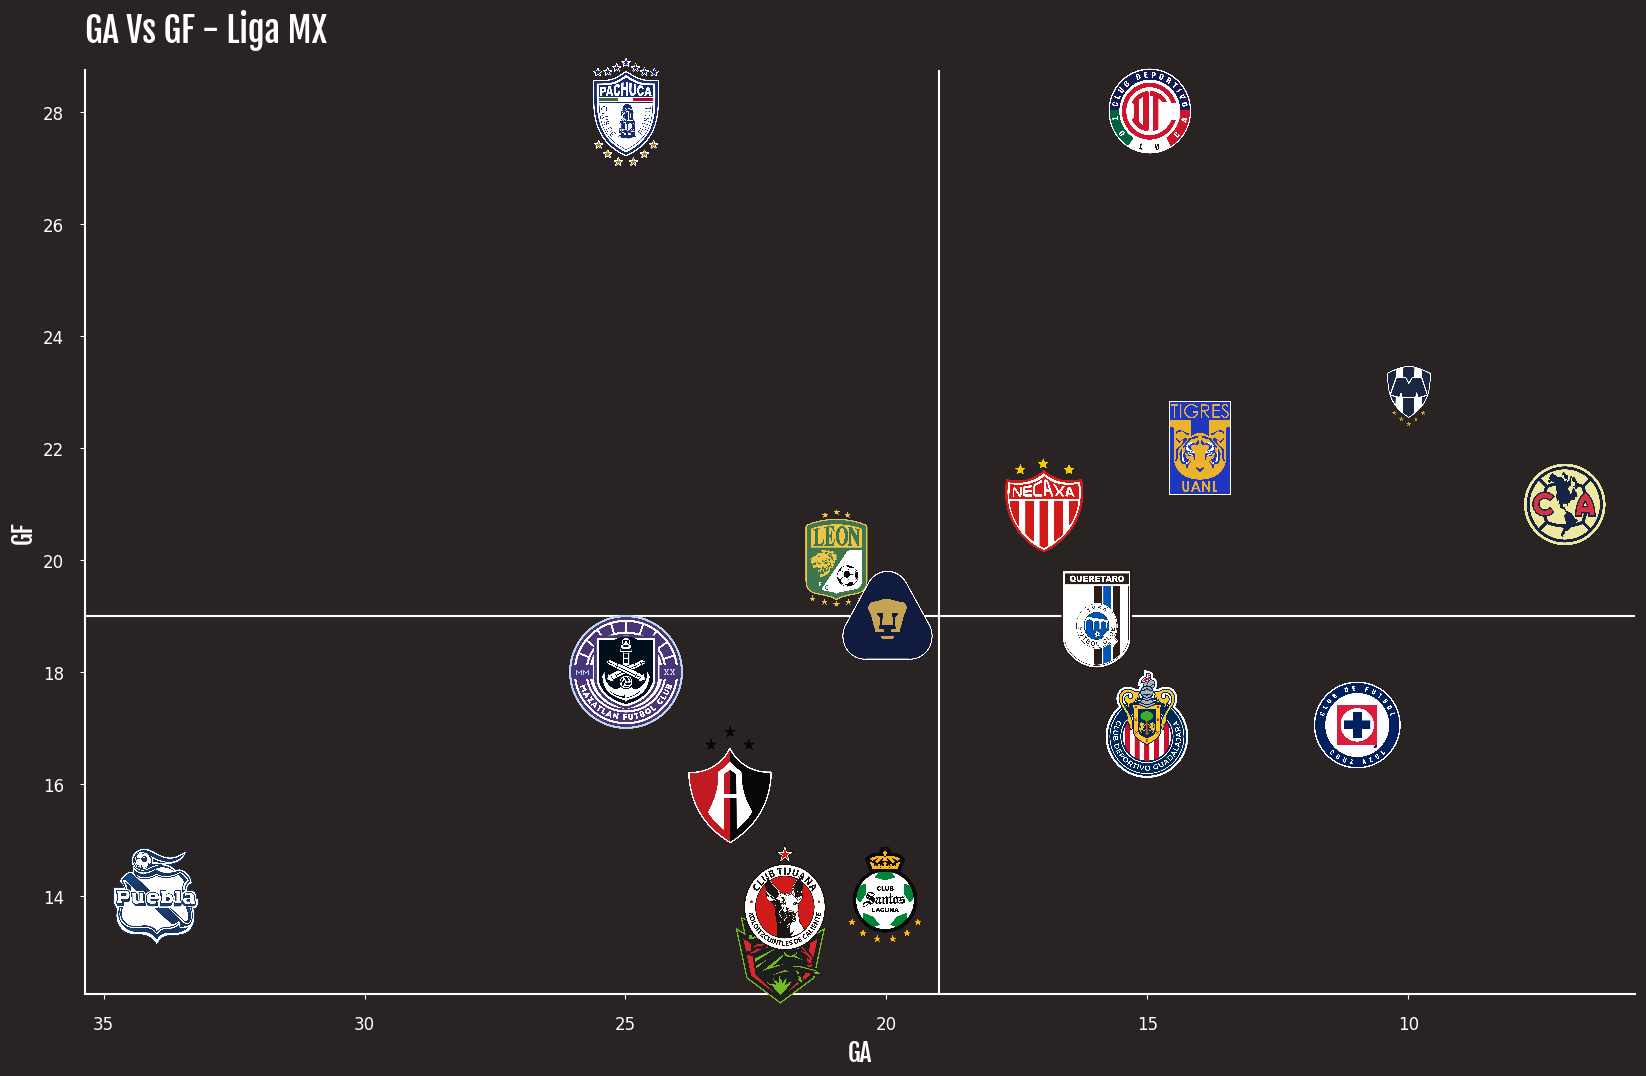

In [9]:
from utils import *
import pandas as pd
# xvars = ['xG','xGA', 'GF','GA']

df = pd.read_csv("data/csvdata/scores_and_fixtures.csv").iloc[:,1:]
season_stages = ['Clausura']
temporada = '2023-2024'
columns = ['MetaEquipo',
                   'xG','xGA', 'GF','GA'
                   ]
data = df[(df.Temporada == temporada) & (df.SeasonStage.isin(season_stages))].dropna(subset={'Result'})[columns]
data = data.groupby('MetaEquipo').sum().reset_index()
make_scatter_team_plot(data, 
    xcolumn='GA',
    ycolumn= 'GF', 
    title="", 
    xlabel='GA', ylabel='GF', zoom=0.063)


In [4]:
import pandas as pd
import sqlite3
import time


# Define a function to determine the SeasonStage
def determine_season_stage(date, round_info):
    if "Apertura" in round_info and "Regular Season" in round_info:
        return "Apertura"
    elif "Clausura" in round_info and "Regular Season" in round_info:
        return "Clausura"
    elif "Guardianes" in round_info:
        return "Guardianes"
    else:
        month = pd.to_datetime(date).month
        if month < 6:
            return "Liguilla-Clausura"
        return "Liguilla-Apertura"

# Define a function to extract the year
def extract_year(round_info, date):
    if "Quarter-finals" in round_info or "Semi-finals" in round_info or "Repechaje" or "Reclasificacion" in round_info or "Finals" in round_info:
        year = pd.to_datetime(date).year
        year = str(year)
        return year
    return ''.join(filter(str.isdigit, round_info))

# Define a function to determine the Season Type
def determine_season_type(round_info):
    if len(round_info.split('— ')) > 1:
        return round_info.split('— ')[-1]
    if len(round_info.split(' ')) > 1:
        return round_info.split(' ')[-2] + " " + round_info.split(' ')[-1]
    return round_info.split(' ')[-1]

# Función para extraer la temporada del enlace
def extraer_temporada(link):
    temporada = link.split('/')[-2]
    return temporada

def fbref_pull_and_store_data(metadata):
    # Procesar cada fila y actualizar/crear bases de datos SQL
    # complete this ditionary with the metadata of the tables you want to update
    unique_teams  = metadata.MetaEquipo.unique().tolist()
    datos_equipo = []  # Inicializar el DataFrame para los datos del equipo
    data_dict = {x : metadata[metadata.MetaEquipo == x] for x in unique_teams}

    for _, grupo in data_dict.items():
        print(f"Procesando base de datos: ")

        for _, fila in grupo.iterrows():
            tabla_nombre = fila['Tabla']
            link = fila['Link']
            metaequipo = fila['MetaEquipo']
            temporada = extraer_temporada(link) 

            print(f"Descargando datos de {tabla_nombre}, Temporada: {temporada} desde {link}")
            
            time.sleep(1)  # Espera 1 segundo entre cada solicitud
            datos_tabla = pd.read_html(link)
            datos_tabla = datos_tabla[1]
            datos_tabla['Temporada'] = temporada  # Agregar la temporada como columna
            datos_tabla['MetaEquipo'] = metaequipo
            
            datos_tabla.columns = datos_tabla.columns.str.replace(' ', '_') # Reemplazar espacios con guiones bajos 
            # datos_tabla.columns = datos_tabla.columns.droplevel(0)
            datos_equipo.append(datos_tabla)
    return pd.concat(datos_equipo, ignore_index=True, sort=False)

def data_cleaning(df):
    df['Formation'] = df.Formation.apply(lambda x: "" if x == None else x)

    df['Formation'] = df.Formation.apply(lambda x: x if '◆' not in x else x.split('◆')[0])
    df['GF'] = df['GF'].apply(lambda x: x if x != None else '0')
    df['GF'] = df['GF'].apply(lambda x: x if "(" not in x else x.split("(")[0])
    df['GF'] = df['GF'].astype(float)
    df['GA'] = df['GA'].apply(lambda x: x if x != None else '0')
    df['GA'] = df['GA'].apply(lambda x: x if "(" not in x else x.split("(")[0])
    df['GA'] = df['GA'].astype(float)
    df['xG'] = df['xG'].apply(lambda x: x if x != None else '0')
    df['xG'] = df['xG'].astype(float)

    df['xGA'] = df['xGA'].apply(lambda x: x if x != None else '0')
    df['xGA'] = df['xGA'].astype(float)
    return df

    
def add_current_points(df):
    # Ordena los datos por temporada, seasonstage, Jornada y fecha para asegurar un orden correcto
    df.sort_values(by=['Temporada', 'SeasonStage', 'MetaEquipo', 'Jornada', 'Date'], inplace=True)
    # Inicializa las columnas 'current_points', 'current_wins' y 'current_goals' en NaN (espacios vacíos)
    df['current_points'] = ''
    df['current_points_home'] = ''
    df['current_points_away'] = ''
    df['current_exp_points'] = ''
    df['current_exp_points_home'] = ''
    df['current_exp_points_away'] = ''
    df['current_wins'] = ''
    df['current_wins_home'] = ''
    df['current_wins_away'] = ''
    df['current_draws'] = ''
    df['current_draws_home'] = ''
    df['current_draws_away'] = ''
    df['current_losses'] = ''
    df['current_losses_home'] = ''
    df['current_losses_away'] = ''
    df['current_goals'] = ''
    df['current_goals_home'] = ''
    df['current_goals_away'] = ''
    df['current_exp_goals'] = ''
    df['current_exp_goals_away'] = ''
    df['current_exp_goals_home'] = ''
    df['current_goals_against'] = ''
    df['current_goals_against_home'] = ''
    df['current_goals_against_away'] = ''
    df['current_exp_goals_against'] = ''
    df['current_exp_goals_against_home'] = ''
    df['current_exp_goals_against_away'] = ''
    df['current_ranking_points'] = ''
    df['current_ranking_points_home'] = ''
    df['current_ranking_points_away'] = ''
    df['current_ranking_wins'] = ''
    df['current_ranking_wins_home'] = ''
    df['current_ranking_wins_away'] = ''
    df['current_ranking_goals'] = ''
    df['current_ranking_goals_home'] = ''
    df['current_ranking_goals_away'] = ''
    df['current_ranking_score'] = ''
    df['current_ranking_score_home'] = ''
    df['current_ranking_score_away'] = ''
    df['current_goals_difference'] = ''
    df['current_goals_difference_home'] = ''
    df['current_goals_difference_away'] = ''
    df['ranking'] = ''
    df['partidos_jugados'] = ''
    df['partidos_jugados_home'] = ''
    df['partidos_jugados_away'] = ''


    temporadas = df.Temporada.unique().tolist()
    temporadas.remove("2020-2021")
    stages = ['Apertura','Clausura']
    jornadas = list(range(18))

    for temp in temporadas:
        for stage in stages:
            puntos_acumulados = {}
            puntos_acumulados_home = {}
            puntos_acumulados_away = {}
            exp_puntos_acumulados = {}
            exp_puntos_acumulados_home = {}
            exp_puntos_acumulados_away = {}
            wins_acumulados = {}
            wins_acumulados_home = {}
            wins_acumulados_away = {}
            draws_acumulados = {}
            draws_acumulados_home = {}
            draws_acumulados_away = {}
            losses_acumulados = {}
            losses_acumulados_home = {}
            losses_acumulados_away = {}
            goals_acumulados = {}
            goals_acumulados_home = {}
            goals_acumulados_away = {}
            exp_goals_acumulados = {}
            exp_goals_acumulados_home = {}
            exp_goals_acumulados_away = {}
            goals_against_acumulados = {}
            goals_against_acumulados_home = {}
            goals_against_acumulados_away = {}
            exp_goals_against_acumulados = {}
            exp_goals_against_acumulados_home = {}
            exp_goals_against_acumulados_away = {}
            diferencia_goles_acumulados = {}
            diferencia_goles_acumulados_home = {}
            diferencia_goles_acumulados_away = {}
            partidos_jugados = {}
            partidos_jugados_home = {}
            partidos_jugados_away = {}
            sample = df[(df.Temporada == temp) & (df.SeasonStage == stage)].sort_values(by='Date')
            
            for index, row in sample.iterrows():
                equipo = row['MetaEquipo']

                # Verifica si el equipo ya está en el diccionario de puntos acumulados
                if equipo not in puntos_acumulados:
                    puntos_acumulados[equipo] = 0
                    puntos_acumulados_home[equipo] = 0
                    puntos_acumulados_away[equipo] = 0
                    exp_puntos_acumulados[equipo] = 0
                    exp_puntos_acumulados_home[equipo] = 0
                    exp_puntos_acumulados_away[equipo] = 0
                    wins_acumulados[equipo] = 0
                    wins_acumulados_home[equipo] = 0
                    wins_acumulados_away[equipo] = 0
                    draws_acumulados[equipo] = 0
                    draws_acumulados_home[equipo] = 0
                    draws_acumulados_away[equipo] = 0
                    losses_acumulados[equipo] = 0
                    losses_acumulados_home[equipo] = 0
                    losses_acumulados_away[equipo] = 0
                    goals_acumulados[equipo] = 0
                    goals_acumulados_home[equipo] = 0
                    goals_acumulados_away[equipo] = 0
                    exp_goals_acumulados[equipo] = 0
                    exp_goals_acumulados_home[equipo] = 0
                    exp_goals_acumulados_away[equipo] = 0
                    goals_against_acumulados[equipo] = 0
                    goals_against_acumulados_home[equipo] = 0
                    goals_against_acumulados_away[equipo] = 0
                    exp_goals_against_acumulados[equipo] = 0
                    exp_goals_against_acumulados_home[equipo] = 0
                    exp_goals_against_acumulados_away[equipo] = 0
                    diferencia_goles_acumulados[equipo] = 0
                    diferencia_goles_acumulados_home[equipo] = 0
                    diferencia_goles_acumulados_away[equipo] = 0
                    partidos_jugados[equipo] = 0
                    partidos_jugados_home[equipo] = 0
                    partidos_jugados_away[equipo] = 0

                # Asigna los puntos según el resultado del partido
                if row['Venue'] == 'Home':
                    partidos_jugados_home[equipo] += 1
                    goals_acumulados_home[equipo] += row['GF']
                    goals_against_acumulados_home[equipo] += row['GA']
                    exp_goals_acumulados_home[equipo] += row['xG']
                    exp_goals_against_acumulados_home[equipo] += row['xGA']
                    diferencia_goles_acumulados_home[equipo] += row['GF'] - row['GA']
                else:
                    partidos_jugados_away[equipo] += 1
                    goals_acumulados_away[equipo] += row['GF']
                    goals_against_acumulados_away[equipo] += row['GA']
                    exp_goals_acumulados_away[equipo] += row['xG']
                    exp_goals_against_acumulados_away[equipo] += row['xGA']
                    diferencia_goles_acumulados_away[equipo] += row['GF'] - row['GA']

                if row['Result'] == 'W':
                    puntos_acumulados[equipo] += 3
                    wins_acumulados[equipo] += 1
                    if row['Venue'] == 'Home':
                        puntos_acumulados_home[equipo] += 3
                        wins_acumulados_home[equipo] += 1
                        
                    else:
                        puntos_acumulados_away[equipo] += 3
                        wins_acumulados_away[equipo] += 1


                elif row['Result'] == 'D':
                    puntos_acumulados[equipo] += 1
                    draws_acumulados[equipo] += 1
                    if row['Venue'] == 'Home':
                        puntos_acumulados_home[equipo] += 1
                        draws_acumulados_home[equipo] += 1
                    else:
                        puntos_acumulados_away[equipo] += 1
                        draws_acumulados_away[equipo] += 1
                else:
                    losses_acumulados[equipo] += 1
                    if row['Venue'] == 'Home':
                        losses_acumulados_home[equipo] += 1
                    else:
                        losses_acumulados_away[equipo] += 1
                
                if row['Expected_Results'] == "W":
                    exp_puntos_acumulados[equipo] += 3
                    if row['Venue'] == 'Home':
                        exp_puntos_acumulados_home[equipo] += 3
                    else:
                        exp_puntos_acumulados_away[equipo] += 3
                elif row['Expected_Results'] == "D":
                    exp_puntos_acumulados[equipo] += 1
                    if row['Venue'] == 'Home':
                        exp_puntos_acumulados_home[equipo] += 1
                    else:
                        exp_puntos_acumulados_away[equipo] += 1

                # Suma los goles
                partidos_jugados[equipo] += 1
                goals_acumulados[equipo] += row['GF']
                exp_goals_acumulados[equipo] += row['xG']
                goals_against_acumulados[equipo] += row['GA']
                exp_goals_against_acumulados[equipo] += row['xGA']
                diferencia_goles_acumulados[equipo] += row['GF'] - row['GA']

                # Asigna los valores acumulados a las columnas correspondientes
                sample.at[index, 'current_points'] = puntos_acumulados[equipo]
                sample.at[index, 'current_points_home'] = puntos_acumulados_home[equipo]
                sample.at[index, 'current_points_away'] = puntos_acumulados_away[equipo]
                sample.at[index, 'current_exp_points'] = exp_puntos_acumulados[equipo]
                sample.at[index, 'current_exp_points_home'] = exp_puntos_acumulados_home[equipo]
                sample.at[index, 'current_exp_points_away'] = exp_puntos_acumulados_away[equipo]
                sample.at[index, 'current_wins'] = wins_acumulados[equipo]
                sample.at[index, 'current_wins_home'] = wins_acumulados_home[equipo]
                sample.at[index, 'current_wins_away'] = wins_acumulados_away[equipo]
                sample.at[index, 'current_draws'] = draws_acumulados[equipo]
                sample.at[index, 'current_draws_home'] = draws_acumulados_home[equipo]
                sample.at[index, 'current_draws_away'] = draws_acumulados_away[equipo]
                sample.at[index, 'current_losses'] = losses_acumulados[equipo]
                sample.at[index, 'current_losses_home'] = losses_acumulados_home[equipo]
                sample.at[index, 'current_losses_away'] = losses_acumulados_away[equipo]
                sample.at[index, 'current_goals'] = goals_acumulados[equipo]
                sample.at[index, 'current_goals_home'] = goals_acumulados_home[equipo]
                sample.at[index, 'current_goals_away'] = goals_acumulados_away[equipo]
                sample.at[index, 'current_exp_goals'] = exp_goals_acumulados[equipo]
                sample.at[index, 'current_exp_goals_home'] = exp_goals_acumulados_home[equipo]
                sample.at[index, 'current_exp_goals_away'] = exp_goals_acumulados_away[equipo]
                sample.at[index, 'current_goals_against'] = goals_against_acumulados[equipo]
                sample.at[index, 'current_goals_against_home'] = goals_against_acumulados_home[equipo]
                sample.at[index, 'current_goals_against_away'] = goals_against_acumulados_away[equipo]
                sample.at[index, 'current_exp_goals_against'] = exp_goals_against_acumulados[equipo]
                sample.at[index, 'current_exp_goals_against_home'] = exp_goals_against_acumulados_home[equipo]
                sample.at[index, 'current_exp_goals_against_away'] = exp_goals_against_acumulados_away[equipo]
                sample.at[index, 'current_goals_difference'] = diferencia_goles_acumulados[equipo]
                sample.at[index, 'current_goals_difference_home'] = diferencia_goles_acumulados_home[equipo]
                sample.at[index, 'current_goals_difference_away'] = diferencia_goles_acumulados_away[equipo]
                sample.at[index, 'partidos_jugados'] = partidos_jugados[equipo]
                sample.at[index, 'partidos_jugados_home'] = partidos_jugados_home[equipo]
                sample.at[index, 'partidos_jugados_away'] = partidos_jugados_away[equipo]
            

            for jornada in jornadas:
                subsample = sample[sample.Jornada == jornada]
                subsample.sort_values(by=['current_points','current_goals_difference','current_goals'], inplace=True, ascending=False)
                subsample['ranking'] = range(1,len(subsample) + 1)
                sample.loc[subsample.index] = subsample
                
            df.loc[sample.index] = sample
    
    name_mapping = {
    'America' : 'América',
    'Atlas' : 'Atlas',
    'Atletico' : 'Atlético',
    'Cruz_Azul' : 'Cruz Azul',
    'FC_Juarez' : 'FC Juárez',
    'Guadalajara' : 'Guadalajara',
    'Leon' : 'León',
    'Mazatlan' : 'Mazatlán',
    'Monterrey' : 'Monterrey',
    'Necaxa' : 'Necaxa',
    'Pachuca' : 'Pachuca',
    'Puebla' : 'Puebla',
    'Pumas_UNAM' : 'UNAM',
    'Queretaro' : 'Querétaro',
    'Santos_Laguna' : 'Santos',
    'Tijuana' : 'Tijuana',
    'Toluca' : 'Toluca',
    'UANL' : 'UANL',
}


    aux_df = df[['Date','MetaEquipo','ranking']]
    aux_df = aux_df.rename(columns={'MetaEquipo':'Opponent', 'ranking':'opponent_ranking'})
    aux_df['Opponent'] = aux_df['Opponent'].apply(lambda x: name_mapping[x])

    df = df.merge(aux_df, on=['Date','Opponent'], how='left')
    return df
    
def add_columns(df):

    df['TotalGoals'] = df['GF'] + df['GA']
    df['GoalsDifference'] = df['GF'] - df['GA']
    # Write a set of columns that describe with a boolean if the GF is > than 0,1,2,3,4,5
    for i in range(0, 6):
        df[f'GF_>{i}'] = df['GF'].apply(lambda x: 1 if x > i else 0)
        df[f'GA_>{i}'] = df['GA'].apply(lambda x: 1 if x > i else 0)
        df[f'GF_<{i}'] = df['GF'].apply(lambda x: 1 if x < i else 0)
        df[f'GA_<{i}'] = df['GA'].apply(lambda x: 1 if x < i else 0)
        df[f'GF_={i}'] = df['GF'].apply(lambda x: 1 if x == i else 0)
        df[f'GA_={i}'] = df['GA'].apply(lambda x: 1 if x == i else 0)
        df[f'TotalGoals_>{i}'] = df['TotalGoals'].apply(lambda x: 1 if x > i else 0)
        df[f'GoalsDifference_>{i}'] = df['GoalsDifference'].apply(lambda x: 1 if x > i else 0)
        df[f'TotalGoals_<{i}'] = df['TotalGoals'].apply(lambda x: 1 if x < i else 0)
        df[f'GoalsDifference_<{i}'] = df['GoalsDifference'].apply(lambda x: 1 if x < i else 0)
        df[f'TotalGoals_={i}'] = df['TotalGoals'].apply(lambda x: 1 if x == i else 0)
        df[f'GoalsDifference_={i}'] = df['GoalsDifference'].apply(lambda x: 1 if x == i else 0)
        for j in range(0, 6):
            df[f'GF_>{i} & GA_>{j}'] = df.apply(lambda row: 1 if row['GF'] > i and row['GA'] > j else 0, axis=1)
            df[f'GF_>{i} & GA_<{j}'] = df.apply(lambda row: 1 if row['GF'] > i and row['GA'] < j else 0, axis=1)
            df[f'GF_>{i} & GA_={j}'] = df.apply(lambda row: 1 if row['GF'] > i and row['GA'] == j else 0, axis=1)
            df[f'GF_<{i} & GA_>{j}'] = df.apply(lambda row: 1 if row['GF'] < i and row['GA'] > j else 0, axis=1)
            df[f'GF_<{i} & GA_<{j}'] = df.apply(lambda row: 1 if row['GF'] < i and row['GA'] < j else 0, axis=1)
            df[f'GF_<{i} & GA_={j}'] = df.apply(lambda row: 1 if row['GF'] < i and row['GA'] == j else 0, axis=1)
            df[f'GF_={i} & GA_>{j}'] = df.apply(lambda row: 1 if row['GF'] == i and row['GA'] > j else 0, axis=1)
            df[f'GF_={i} & GA_<{j}'] = df.apply(lambda row: 1 if row['GF'] == i and row['GA'] < j else 0, axis=1)
            df[f'GF_={i} & GA_={j}'] = df.apply(lambda row: 1 if row['GF'] == i and row['GA'] == j else 0, axis=1)
            df[f'TotalGoals_>{i} & GoalsDifference_>{j}'] = df.apply(lambda row: 1 if row['TotalGoals'] > i and row['GoalsDifference'] > j else 0, axis=1)
            df[f'TotalGoals_>{i} & GoalsDifference_<{j}'] = df.apply(lambda row: 1 if row['TotalGoals'] > i and row['GoalsDifference'] < j else 0, axis=1)
            df[f'TotalGoals_>{i} & GoalsDifference_={j}'] = df.apply(lambda row: 1 if row['TotalGoals'] > i and row['GoalsDifference'] == j else 0, axis=1)
            df[f'TotalGoals_<{i} & GoalsDifference_>{j}'] = df.apply(lambda row: 1 if row['TotalGoals'] < i and row['GoalsDifference'] > j else 0, axis=1)
            df[f'TotalGoals_<{i} & GoalsDifference_<{j}'] = df.apply(lambda row: 1 if row['TotalGoals'] < i and row['GoalsDifference'] < j else 0, axis=1)
            df[f'TotalGoals_<{i} & GoalsDifference_={j}'] = df.apply(lambda row: 1 if row['TotalGoals'] < i and row['GoalsDifference'] == j else 0, axis=1)
            df[f'TotalGoals_={i} & GoalsDifference_>{j}'] = df.apply(lambda row: 1 if row['TotalGoals'] == i and row['GoalsDifference'] > j else 0, axis=1)
            df[f'TotalGoals_={i} & GoalsDifference_<{j}'] = df.apply(lambda row: 1 if row['TotalGoals'] == i and row['GoalsDifference'] < j else 0, axis=1)
            df[f'TotalGoals_={i} & GoalsDifference_={j}'] = df.apply(lambda row: 1 if row['TotalGoals'] == i and row['GoalsDifference'] == j else 0, axis=1)



    # Write the column "Jornada" being the rownumber ordered by Date with partition by MetaEquipo, Temporada, SeasonStage only for those rows where the 'Season Type' is 'Regular Season'
    df['Jornada'] = df[df['Season Type'] == 'Regular Season'].groupby(['MetaEquipo', 'Temporada', 'SeasonStage'])['Date'].rank(method='dense', ascending=True).astype(int)
    df['xG'] = df['xG'].fillna(0)
    df['xGA'] = df['xGA'].fillna(0)
    
    df['Expected_GF'] = df['xG'].apply(lambda x: round(x))
    df['Expected_GA'] = df['xGA'].apply(lambda x: round(x))

    # Write the column "Expected_Results" Which is "W" if round(xG) > round(xGA), "D" if round(xG) == round(xGA) and "L" if round(xG) < round(xGA)
    df['Expected_Results'] = df.apply(lambda row: 'W' if row['Expected_GF'] > row['Expected_GA'] else 'D' if row['Expected_GF'] == row['Expected_GA'] else 'L', axis=1)
    df['Expected_Goals_Difference'] = df['Expected_GF'] - df['Expected_GA']

    #Write the column "game_num" being the rownumber ordered by Date with partition by MetaEquipo, Temporada
    df['game_num'] = df.groupby(['MetaEquipo', 'Temporada'])['Date'].rank(method='dense', ascending=True).astype(int)
    
    df['points'] = df.apply(lambda row: 3 if row['Result'] == 'W' else 1 if row['Result'] == 'D' else 0, axis=1)
    df['expected_points'] = df.apply(lambda row: 3 if row['Expected_Results'] == 'W' else 1 if row['Result'] == 'D' else 0, axis=1)
    df = add_current_points(df)
    return df

def read_scores_and_fixture_db():

    conn = sqlite3.connect(f'data/sqldata/Historic_scores_and_fixtures.db')
    c = conn.cursor()
    query = """ 
                SELECT * 
                FROM scores_and_fixture
            """
    c.execute(query)
    c.fetchall()
    df = pd.read_sql_query(query, conn)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    return df

if __name__ == '__main__':
    metadata = pd.read_csv("data/csvdata/metadata.csv")
    # update_scores_and_features(metadata, current_season='2023-2024')
    df = read_scores_and_fixture_db()
    df = data_cleaning(df)
    df = add_columns(df)
    df.to_csv('data/csvdata/scores_and_fixtures.csv')


/tmp/ipykernel_7965/1280864312.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.sort_values(by=['current_points','current_goals_difference','current_goals'], inplace=True, ascending=False)
/tmp/ipykernel_7965/1280864312.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.sort_values(by=['current_points','current_goals_difference','current_goals'], inplace=True, ascending=False)
/tmp/ipykernel_7965/1280864312.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen